In [45]:
import collections
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from IPython.display import Markdown, display
import random
import matplotlib.pyplot as plt

In [2]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


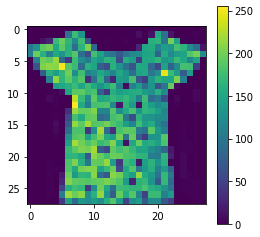

Image (#2560): Which is label number '6', or label 'Shirt''


In [4]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 2560 
each = x_train[sample]

plt.figure(figsize=(4,4))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))

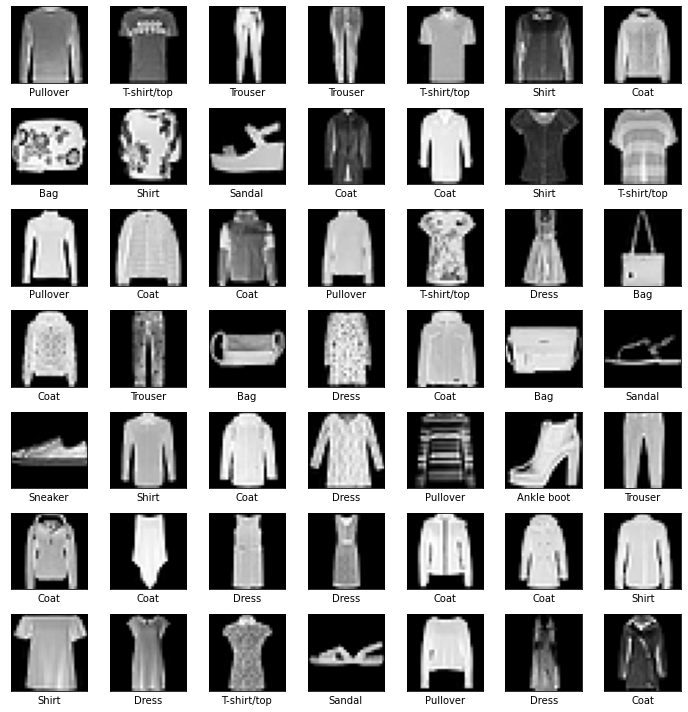

In [5]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

In [6]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [7]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [38]:
from sklearn.svm import SVC

# SVM Model
start1 = time.time()

#svc = SVC(C=1, kernel='linear', gamma="auto")
svc = SVC(C=1, kernel='poly', gamma=0.1)
#svc = SVC(kernel="rbf", C = 1.0, gamma="auto")
#svc = SVC(decision_function_shape='ovo')
history = svc.fit(x_train, y_train)

end1 = time.time()
svm_time = end1-start1

print("SVM Time: {:0.2f} minute".format(svm_time/60.0))

SVM Time: 4.94 minute


-----------------SVM Report---------------
F1 score: 0.8768717450156306
Accuracy score: 0.8775
Confusion matrix: 
 [[841   5  21  24   4   2  93   0   9   1]
 [  3 980   3   9   3   0   2   0   0   0]
 [ 40   5 826  10  64   0  51   0   4   0]
 [ 38  15  24 864  25   0  29   0   5   0]
 [  3   2 109  36 786   0  59   0   5   0]
 [  0   0   0   1   0 961   0  20   4  14]
 [147   2  94  28  70   1 648   0  10   0]
 [  0   0   0   0   0  23   0 948   0  29]
 [  6   0   9   5   2   3  10   2 963   0]
 [  0   1   0   0   0  12   1  28   0 958]]
Plotting confusion matrix


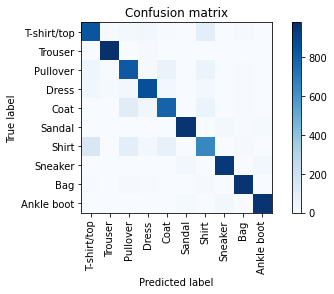

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.97      0.98      0.98      1000
           2       0.76      0.83      0.79      1000
           3       0.88      0.86      0.87      1000
           4       0.82      0.79      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.65      0.68      1000
           7       0.95      0.95      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [39]:
### SVM report and analysis

y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

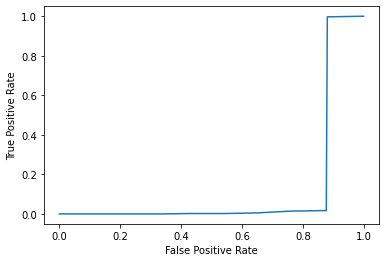

In [44]:
### ROC Curve

#print(len(y_test.shape))
#print(len(y_pred_svc.shape))

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay


fpr,tpr , threshold = roc_curve(y_test , y_pred_svc , pos_label = svc.classes_[1])
roc_curvedisplay = RocCurveDisplay(fpr = fpr , tpr = tpr).plot()